In [42]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv("C://Users//Choud//Downloads/newplacementdata - newplacementdata.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


# Outliers ----> These are the data points who fluate the mean of our data.

        ## For check ---> we will use BoxPlot
        # In BoxPlot, we have some identification parameters.

        # (1). Lower Fence
        # (2). 25% of data
        # (3). 50% of data (Interquartile Range)
        # (4). 75% of data
        # (5). Upper Fence

        # If any point is lower than lower fence then it will consider as outlier.
        # If any point is upper than upper fence then it will consider as outlier.

        # Ex. a = 1,2,3,4,5
        
        # mean = (1+2+3+4+5)/5 = 15/5 = 3
# how to handle outlaiers
# (1)->trimming
         # ex. a=1,2,3,4,5
        # let suppose  here 1 is outlear [2-5]
# (2).capping
           ex. -2,-1-,01,2,3,4,100,200
           ## min_facing =0 ,max_fence=4
           ## range expand ---> min =-2 ,max =200

In [96]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [49]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [53]:
## even =((n/2))+((n/2)+1)/_2
## odd=((n/2)+1)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

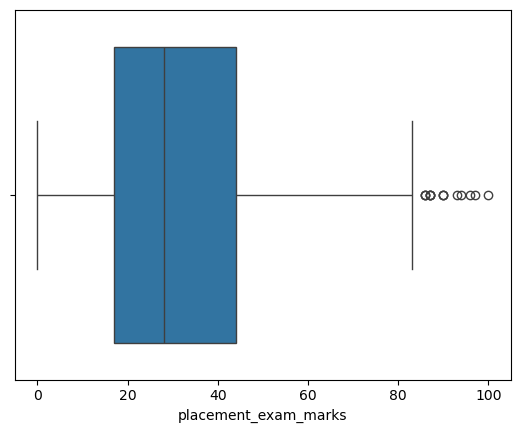

In [61]:
sns.boxplot(x=df['placement_exam_marks'])

In [65]:
## find the IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [67]:
percentile25

17.0

In [69]:
percentile75

44.0

In [73]:
IQR=percentile75-percentile25
IQR

27.0

In [77]:
upper_limit=percentile75-1.5*IQR
upper_limit

3.5

In [81]:
lower_limit=percentile25-1.5*IQR
lower_limit

-23.5

## find outliers 

In [84]:
df[df['placement_exam_marks']<upper_limit].head(3)

,cgpa,placement_exam_marks,placed
74,6.16,3,1
117,7.11,0,1
219,5.48,3,0


In [91]:
df[df['placement_exam_marks']<lower_limit].head(3)

,cgpa,placement_exam_marks,placed


## # (1)->trimming

In [87]:
newdf=df[df['placement_exam_marks']<upper_limit]

In [99]:
newdf

,cgpa,placement_exam_marks,placed
74,6.16,3,1
117,7.11,0,1
219,5.48,3,0
701,6.74,2,1
863,8.04,2,1
943,7.36,2,0


In [20]:
#comparision

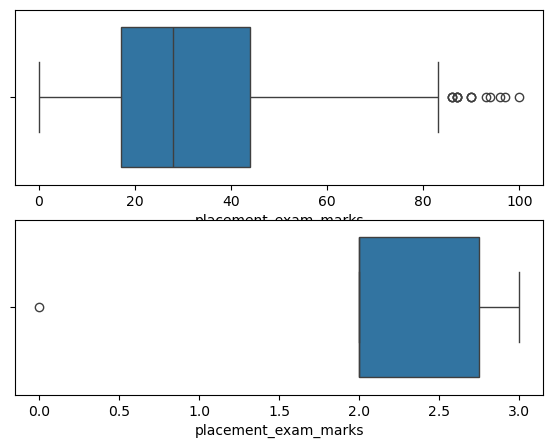

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(x=newdf['placement_exam_marks'])
plt.show()

# capping (outliers removing techinique 2)


In [23]:
new_df_cap=df.copy()

In [24]:
## min=5 ,max=15
## min 4,3,1
## max =20,30,50
## update_min_value =1
## ## update_man_value =50

In [25]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [26]:
new_df_cap.shape

(1000, 3)

In [27]:
## coparision 

AttributeError: module 'seaborn' has no attribute 'subplot'

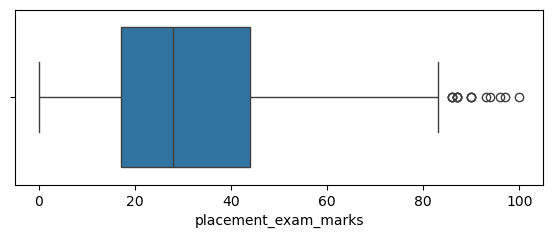

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(222)
sns.boxplot(x= df['placement_exam_marks'])
sns.subplot(224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.show()

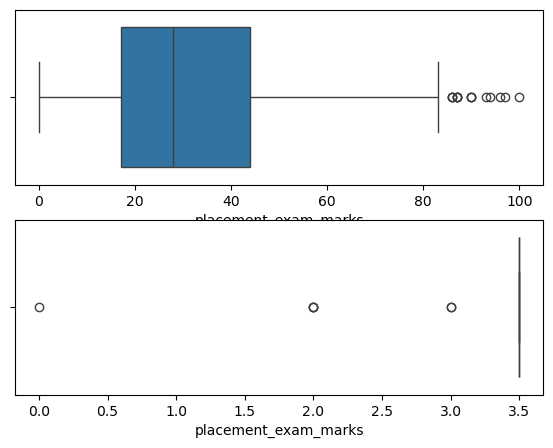

In [35]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x= df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x= new_df_cap['placement_exam_marks'])
plt.show()